In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [12]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [18]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [13]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [16]:
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [17]:
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


# Exploratory Precipitation Analysis

In [23]:
# Find the most recent date in the data set.
session.query(measurement.date).order_by(measurement.date.desc()).first()

('2017-08-23',)

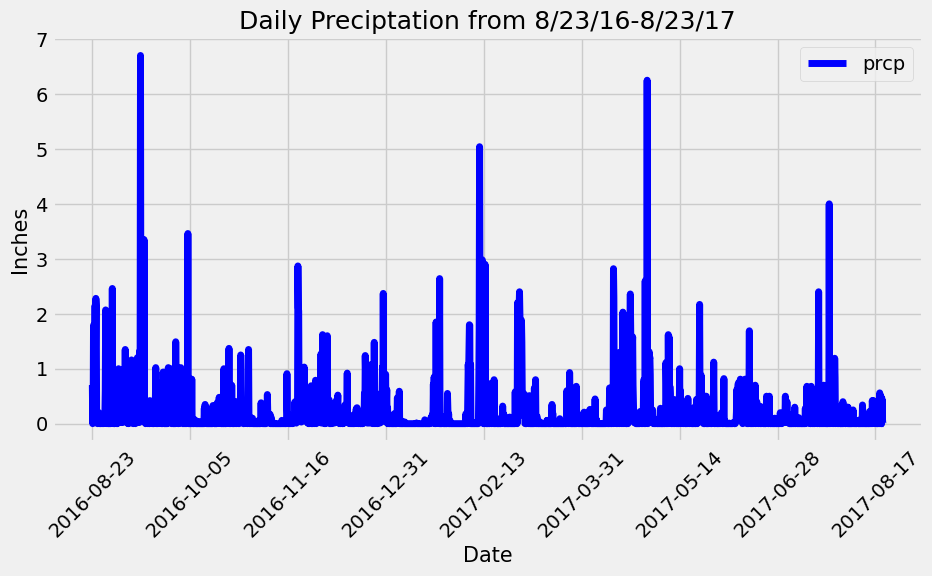

In [74]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
prcp_data = session.query(measurement.date, measurement.prcp).\
            filter (measurement.date <= '2017-08-23').\
            filter (measurement.date >= '2016-08-23').\
            filter (measurement.prcp != 'None').\
            order_by(measurement.date.desc()).all()
# Calculate the date one year from the last date in data set.
prcp_data[0], prcp_data[-1]

# Perform a query to retrieve the data and precipitation scores
pcp_data = pd.DataFrame(prcp_data)
pcp_data['date'].value_counts()

# Save the query results as a Pandas DataFrame and set the index to the date column
df=pd.DataFrame(prcp_data).set_index('date')
df.head(25)

# Sort the dataframe by date
df=df.sort_index()

# Use Pandas Plotting with Matplotlib to plot the data

df.plot(kind="line",figsize=(10,5),
                 color='blue',
                linewidth=5)
plt.title("Daily Preciptation from 8/23/16-8/23/17",fontsize=18)
plt.xticks(rotation=45)
plt.xlabel("Date",fontsize=15)
plt.ylabel("Inches",fontsize=15)

plt.show()




In [55]:
# Use Pandas to calculate the summary statistics for the precipitation data
df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [58]:
# Design a query to calculate the total number stations in the dataset
stations=session.query(station.station).count()
print(stations)

9


In [59]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
session.query(measurement.station,func.count(measurement.id)).\
            group_by(measurement.station).\
            order_by(func.count(measurement.id).desc()).all()  

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [64]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(measurement.station, func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)).\
            group_by(measurement.station).\
            order_by(func.count(measurement.tobs).desc()).first() 

('USC00519281', 54.0, 85.0, 71.66378066378067)

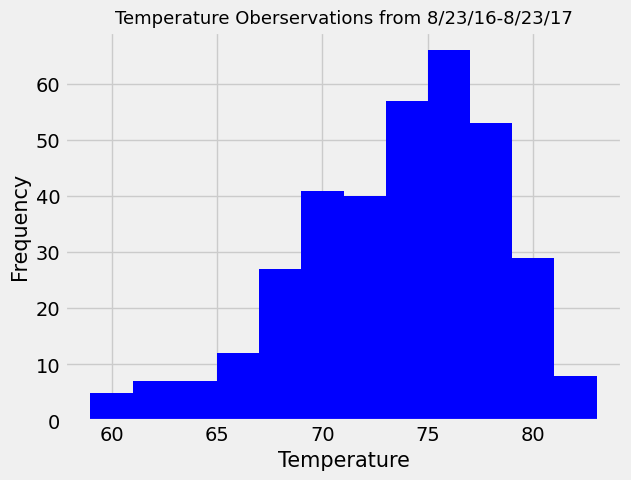

In [73]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
import datetime as dt
from pandas.plotting import table

temp_data=session.query(measurement.tobs).\
            filter(measurement.date <= '2017-08-23').\
            filter(measurement.date >= '2016-08-23').\
            filter(measurement.tobs != 'None').\
            filter(measurement.station=='USC00519281').all()

#create a list of temperature observations from the query
temp=[temp[0] for temp in temp_data]

#create the histogram
plt.hist(temp,bins=12,color='blue',)
plt.title("Temperature Oberservations from 8/23/16-8/23/17",fontsize=13)
plt.xlabel("Temperature",fontsize=15)
plt.ylabel("Frequency",fontsize=15)

plt.show()

# Close Session

In [71]:
session.close()